___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
# warnings.filterwarnings("ignore")
# warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
tf.__version__

'2.9.2'

In [4]:
# !pip install matplotlib --upgrade

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [5]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [6]:
print(f"There are {len(X_train)} images in the training dataset")
print(f"There are {len(X_test)} images in the test dataset")

There are 60000 images in the training dataset
There are 10000 images in the test dataset


In [7]:
X_train[5].shape

(28, 28)

In [8]:
X_train[5]

array([[  0,   0,   0,   0,   1,   0,   0,   0,   0,  22,  88, 188, 172,
        132, 125, 141, 199, 143,   9,   0,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,  20, 131, 199, 206, 196, 202, 242,
        255, 255, 250, 222, 197, 206, 188, 126,  17,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,  35, 214, 191, 183, 178, 175, 168, 150,
        162, 159, 152, 158, 179, 183, 189, 195, 185,  82,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 170, 190, 172, 177, 176, 171, 169, 162,
        155, 148, 154, 169, 174, 175, 175, 177, 183, 188,  12,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  25, 194, 180, 178, 174, 184, 187, 189, 187,
        184, 181, 189, 200, 197, 193, 190, 178, 175, 194,  90,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  42, 218, 191, 197, 208, 204, 211, 209, 210,
        212, 211, 214, 215, 213, 214, 211, 211, 191, 200, 158,   0,   0,
          0,   0],
       [  

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

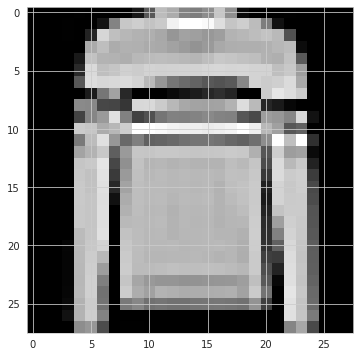

In [9]:
plt.imshow(X_train[5], cmap="gray")
plt.show()

In [10]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

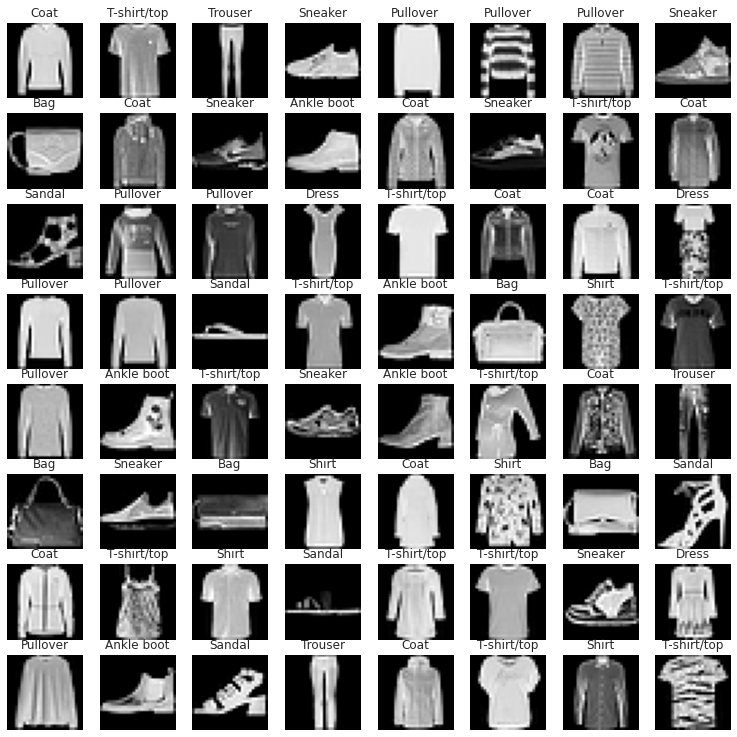

In [11]:
fig, axes = plt.subplots(8, 8)
fig.set_size_inches(13, 13)
for ax in axes.flatten():
    rand_index = int(np.random.randint(low=0, high=60000, size=1))
    ax.axis('off')
    ax.set_title(classes[int(y_train[rand_index])])
    ax.imshow(X_train[rand_index], cmap="gray")
plt.show()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [12]:
X_train[5].min()

0

In [13]:
X_train[5].max()

255

In [14]:
# Normalize image pixels

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [15]:
X_train[5].min()

0.0

In [16]:
X_train[5].max()

1.0

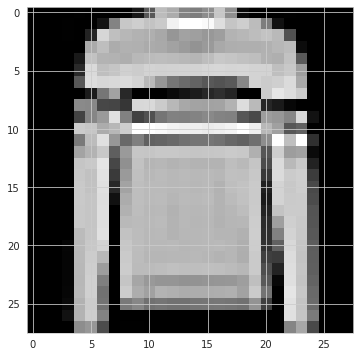

In [17]:
plt.imshow(X_train[5], cmap="gray")
plt.show()

In [18]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [19]:
X_train = np.expand_dims(X_train, 3)
X_test = np.expand_dims(X_test, 3)

In [20]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [21]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [22]:
from tensorflow.keras.utils import to_categorical

In [23]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [25]:
model = Sequential()

model.add(Conv2D(filters=28,
                 kernel_size=(3, 3),
                 input_shape=(28, 28, 1),
                 activation='relu'))  # stride = 1, padding = valid 

model.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1)))  # stride = pool size, padding = valid

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 17500)             0         
                                                                 
 dense (Dense)               (None, 128)               2240128   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2,241,698
Trainable params: 2,241,698
Non-trainable params: 0
______________________________________________

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
early_stop = EarlyStopping(monitor='val_accuracy',
                           mode="max",
                           patience=10,
                           restore_best_weights=True)

In [29]:
model.fit(X_train,
          Y_train,
          batch_size=32,
          epochs=20,
          validation_data=(X_test, Y_test),
          callbacks=[early_stop])

Epoch 1/20
1875/1875 [==============================] - 11s 4ms/step - loss: 0.3808 - accuracy: 0.8659 - val_loss: 0.3180 - val_accuracy: 0.8839
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2551 - accuracy: 0.9106 - val_loss: 0.2848 - val_accuracy: 0.9016
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2181 - accuracy: 0.9228 - val_loss: 0.2891 - val_accuracy: 0.9055
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1930 - accuracy: 0.9319 - val_loss: 0.2769 - val_accuracy: 0.9072
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1749 - accuracy: 0.9381 - val_loss: 0.3011 - val_accuracy: 0.9020
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1584 - accuracy: 0.9449 - val_loss: 0.3144 - val_accuracy: 0.9103
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1461 - accuracy: 0.9489 - val_loss: 0.3506 - val_accuracy

**TASK 7: Plot values of metrics you used in your model.**

In [30]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.381,0.866,0.318,0.884
1,0.255,0.911,0.285,0.902
2,0.218,0.923,0.289,0.905
3,0.193,0.932,0.277,0.907
4,0.175,0.938,0.301,0.902


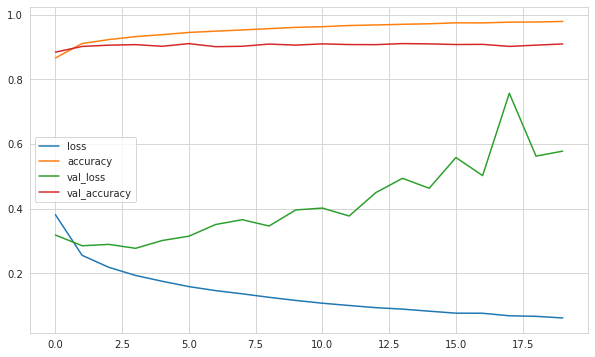

In [31]:
summary.plot();

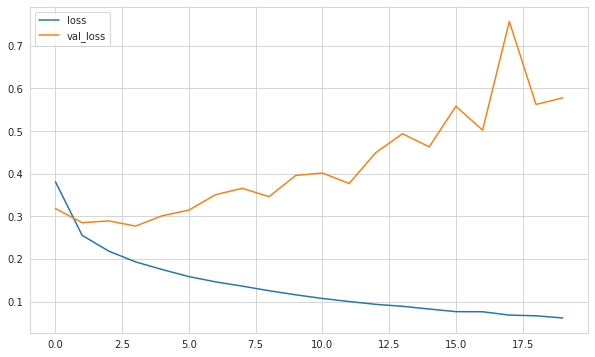

In [32]:
summary[["loss", "val_loss"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [33]:
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix

In [34]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5775936245918274
Test accuracy: 0.9092000126838684


In [35]:
pred_prob = model.predict(X_test)
pred_prob

313/313 [==============================] - 1s 2ms/step


array([[1.52677488e-21, 2.07663473e-27, 4.04425824e-20, ...,
        2.39878766e-08, 1.31417826e-13, 1.00000000e+00],
       [1.20733266e-19, 0.00000000e+00, 1.00000000e+00, ...,
        4.56351817e-36, 0.00000000e+00, 0.00000000e+00],
       [7.18557227e-25, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.53404151e-38, 0.00000000e+00],
       ...,
       [1.33364464e-20, 0.00000000e+00, 6.74919880e-30, ...,
        7.88543363e-16, 1.00000000e+00, 0.00000000e+00],
       [1.15263090e-24, 1.00000000e+00, 1.61554103e-33, ...,
        1.47461081e-36, 6.64436817e-35, 2.91589409e-35],
       [1.64616978e-07, 3.25752169e-16, 1.22142364e-05, ...,
        1.39246956e-01, 1.32967252e-04, 2.30566409e-04]], dtype=float32)

In [36]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1000
           1       0.99      0.98      0.98      1000
           2       0.84      0.87      0.85      1000
           3       0.91      0.90      0.90      1000
           4       0.82      0.89      0.85      1000
           5       0.98      0.97      0.97      1000
           6       0.79      0.72      0.76      1000
           7       0.95      0.97      0.96      1000
           8       0.98      0.97      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [38]:
print(confusion_matrix(y_test, y_pred))

[[851   0  28  18   6   2  91   0   4   0]
 [  2 978   4   8   4   0   3   0   1   0]
 [ 14   0 869   5  70   0  42   0   0   0]
 [ 18  11  12 895  45   0  16   0   3   0]
 [  1   0  52  19 893   2  33   0   0   0]
 [  0   0   0   1   0 966   0  22   2   9]
 [101   2  67  32  69   0 724   0   5   0]
 [  0   0   0   0   0   6   0 975   0  19]
 [  0   1   1   7   3   2   6   6 973   1]
 [  1   0   0   0   0   5   0  26   0 968]]


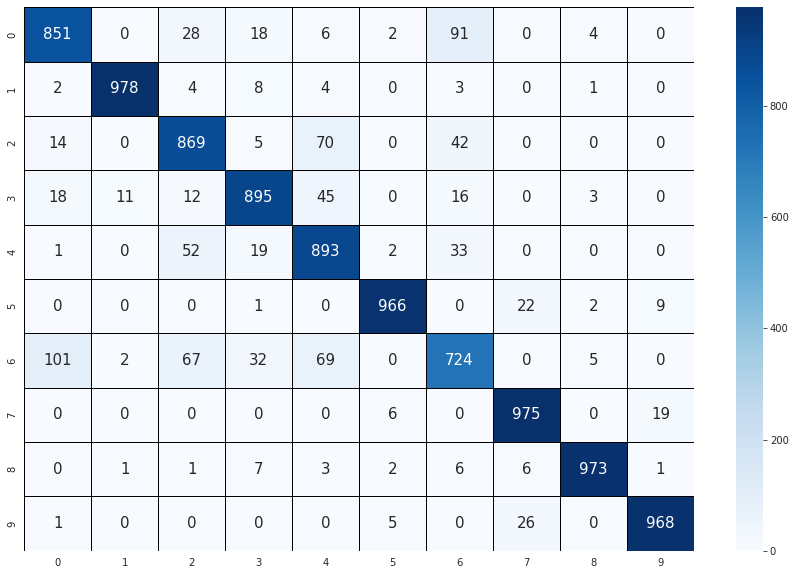

In [39]:
plt.figure(figsize=(15, 10))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True,
            cmap="Blues",
            linewidths=.5,
            linecolor='black',
            fmt='g',
            annot_kws={"size": 15})
plt.show()

In [40]:
# classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

## Model 2

In [58]:
model = Sequential()

model.add(Conv2D(filters=28,
                 kernel_size=(3, 3),
                 input_shape=(28, 28, 1),
                 activation='relu',
                 padding = 'same'))
model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 input_shape=(28, 28, 1),
                 activation='relu',
                 padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1)))  # stride = pool size, padding = valid
model.add(Dropout(0.4))

model.add(Conv2D(filters=128,
                 kernel_size=(3, 3),
                 input_shape=(28, 28, 1),
                 activation='relu',
                 padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1)))  # stride = pool size, padding = valid
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [59]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 28)        280       
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 64)        16192     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 27, 27, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 27, 27, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 27, 27, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 128)      0         
 2D)                                                  

In [60]:
model.fit(X_train,
          Y_train,
          batch_size=32,
          epochs=20,
          validation_data=(X_test, Y_test),
          callbacks=[early_stop])

Epoch 1/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3823 - accuracy: 0.8664 - val_loss: 0.2705 - val_accuracy: 0.9005
Epoch 2/20
1875/1875 [==============================] - 25s 14ms/step - loss: 0.2606 - accuracy: 0.9082 - val_loss: 0.2752 - val_accuracy: 0.9042
Epoch 3/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2461 - accuracy: 0.9145 - val_loss: 0.2526 - val_accuracy: 0.9105
Epoch 4/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2382 - accuracy: 0.9176 - val_loss: 0.2518 - val_accuracy: 0.9151
Epoch 5/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2353 - accuracy: 0.9197 - val_loss: 0.2541 - val_accuracy: 0.9148
Epoch 6/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2340 - accuracy: 0.9196 - val_loss: 0.2415 - val_accuracy: 0.9168
Epoch 7/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2346 - accuracy: 0.9202 - val_loss: 0.2700 -

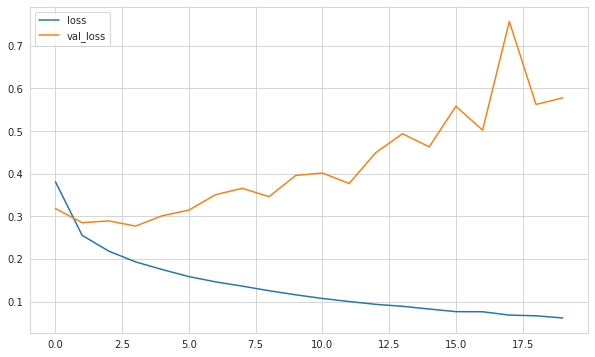

In [61]:
summary[["loss", "val_loss"]].plot()
plt.show()

In [62]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.256247878074646
Test accuracy: 0.9136000275611877


In [63]:
pred_prob = model.predict(X_test)
pred_prob

313/313 [==============================] - 1s 3ms/step


array([[1.49180546e-11, 2.91909629e-16, 1.56324970e-11, ...,
        1.17779207e-04, 1.97486662e-11, 9.99878645e-01],
       [2.73452519e-04, 3.83906231e-14, 9.98076797e-01, ...,
        1.08299994e-10, 4.94819801e-07, 2.10813655e-09],
       [3.75932445e-12, 1.00000000e+00, 4.99363559e-18, ...,
        3.93982049e-16, 6.49438389e-14, 1.31908712e-14],
       ...,
       [1.52564610e-08, 1.55138706e-19, 2.04548356e-09, ...,
        5.22588591e-13, 9.99999642e-01, 7.72259600e-12],
       [2.17973350e-09, 1.00000000e+00, 2.93779181e-14, ...,
        4.48904260e-13, 1.12514934e-12, 2.57827544e-11],
       [1.60220452e-03, 6.82740938e-05, 5.92477992e-03, ...,
        1.35562867e-01, 2.21665829e-01, 3.38106230e-02]], dtype=float32)

In [64]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1000
           1       0.99      0.99      0.99      1000
           2       0.87      0.88      0.88      1000
           3       0.91      0.93      0.92      1000
           4       0.88      0.86      0.87      1000
           5       0.99      0.96      0.98      1000
           6       0.78      0.70      0.74      1000
           7       0.95      0.96      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.95      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True,
            cmap="Blues",
            linewidths=.5,
            linecolor='black',
            fmt='g',
            annot_kws={"size": 15})
plt.show()

## Prediction

In [66]:
my_item = X_test[3]

In [67]:
my_item.shape

(28, 28, 1)

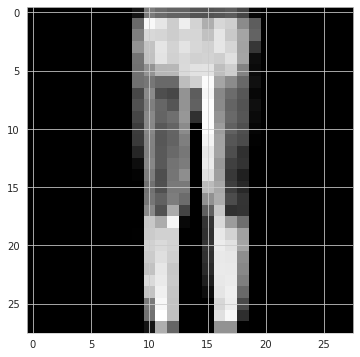

In [68]:
plt.imshow(my_item, cmap='gray')
plt.show()

In [69]:
np.expand_dims(my_item, 0).shape

(1, 28, 28, 1)

In [45]:
pred_prob = model.predict(np.expand_dims(my_item, 0))
pred_prob

1/1 [==============================] - 0s 33ms/step


array([[1.7661973e-22, 1.0000000e+00, 1.9508227e-37, 4.3586210e-24,
        2.7295808e-27, 3.6533429e-38, 1.9871992e-29, 0.0000000e+00,
        9.0353616e-36, 0.0000000e+00]], dtype=float32)

In [70]:
y_pred = np.argmax(pred_prob)
y_pred

21

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___